In this notebook we will investigate the effect of running on coding properities in higher order visual cortices

In [1]:
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import numpy as np
import group_glm as gm
from glm_utils import *
from scipy.stats import linregress
import pprint
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import tensorflow as tf
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline

boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

In [384]:
regions = ['VISp']
lines = ['Cux2-CreERT2']#, 'Rbp4-Cre', 'Rorb-IRES2-Cre'] 

data_set = download_data(regions, lines, [stim_info.STATIC_GRATINGS])


In [249]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

dg = DriftingGratings(data_set.values()[0])

In [274]:
specimen_ids = data_set.values()[0].get_cell_specimen_ids()

specimen_id = specimen_ids[5]

cell_loc = np.argwhere(specimen_ids==specimen_id)[0][0]
print("Specimen ID:", specimen_id)
print("Cell loc:", cell_loc)

('Specimen ID:', 517432899)
('Cell loc:', 5)


In [287]:
subset = dg.sweep_response[dx]

0  \
0    [-9.49982, -3.05871, -5.18349, -3.18282, -0.17...   
1    [-0.701451, 0.759709, -0.105053, 3.99516, -3.0...   
2    [-1.77712, 2.89629, -5.65784, 8.58734, 9.07699...   
3    [-1.56925, 0.603235, -6.73447, 0.500369, -5.27...   
4    [-2.73095, 3.26228, 4.56491, 3.28546, -5.58798...   
5    [4.20868, 3.6009, 4.60902, 2.71331, -0.988537,...   
6    [2.61385, 5.69712, 2.288, 0.415599, -1.38877, ...   
7    [-4.65953, 4.34191, -5.1818, -2.00698, -1.2220...   
8    [-7.51812, -1.90924, -7.1972, -1.88544, -6.526...   
9    [4.42927, 9.10252, 4.78517, -3.9364, -9.57348,...   
10   [-1.72892, -4.63901, 1.72794, 7.04478, 2.71569...   
11   [3.86959, -1.058, 5.73269, 3.57169, -2.46251, ...   
12   [-4.94164, -1.00179, 1.71278, 2.31843, 2.43429...   
13   [1.50305, 0.143969, 0.993609, 8.27281, 7.79827...   
14   [-6.40977, -4.12025, -2.13749, -2.76159, 2.639...   
15   [-4.71611, -2.55398, 5.31565, 3.92841, 3.08104...   
16   [7.77689, 4.34363, 2.0952, 3.93347, 3.53183, -...   
17   [23.2976, 27.3633, 22.3672, 21.3637, 12.2289, ...   
18   [-7.00136, -0.775111, 1.83473, 2.98676, 2.7671...   
19   [-0.821263, -6.89146, -1.33094, -3.00061, 0.24...   
20   [-1.6151, -1.65724, -2.86323, 1.87662, -3.1029...   
21   [2.87399, -0.171429, -6.8989, 3.21587, -0.8171...   
22   [-3.9494, -5.99917, -3.03682, -0.322157, 2.023...   
23   [-3.68117, 3.36701, -4.00873, 2.10987, -5.5144...   
24   [-6.48858, 1.30147, -0.228, -2.87677, -3.9887,...   
25   [-1.79362, -2.49808, -1.86556, 0.496495, 9.574...   
26   [-2.95227, -4.66568, 0.214875, 0.570822, 2.477...   
27   [-6.06299, -3.91887, 1.62425, -1.40873, -2.691...   
28   [-4.95568, 1.01067, -0.959474, 0.735915, -1.35...   
29   [3.5251, -0.94679, 3.86904, 0.07267, -9.28665,...   
..                                                 ...   
598  [3.7017, -6.89514, -1.25183, -0.413251, -0.174...   
599  [-3.97907, -3.86188, -4.00148, 1.62789, -4.913...   
600  [5.56359, -1.39192, 0.304842, -0.743151, 11.27...   
601  [2.81377, 7.40519, -2.87288, -1.17863, -6.7592...   
602  [-6.50573, -5.2922, -8.08567, -6.67422, 7.8334...   
603  [0.762534, -2.76003, 6.31464, 2.8209, -1.89449...   
604  [-8.25207, -3.81171, -7.29443, 10.4098, 8.5319...   
605  [2.21411, 2.13863, 3.17427, 0.249231, 3.01877,...   
606  [7.63927, 4.12029, 9.68345, 10.3094, 3.66951, ...   
607  [5.04845, -3.29518, 10.4899, -2.3032, -3.45806...   
608  [1.59413, 1.75666, 2.57715, 3.66517, 0.232482,...   
609  [-3.3654, 3.72833, -3.54425, 2.25339, 2.47409,...   
610  [2.17263, -8.49714, -4.49361, 1.50392, -0.3460...   
611  [2.70073, -1.62433, -6.14114, 1.03838, -5.8991...   
612  [-5.13853, -4.09349, -0.506216, -5.79277, -1.7...   
613  [5.52722, 3.28666, -0.614977, 3.0268, -3.73869...   
614  [-0.396085, 2.01511, -3.89884, 4.90593, 0.0916...   
615  [-1.81087, 2.33954, 6.73156, -6.20669, 1.0012,...   
616  [-4.5653, -0.572389, 3.60631, 3.69669, -3.1940...   
617  [-2.0806, 6.1458, 1.41146, 3.72411, 0.0568867,...   
618  [0.218773, 3.14801, -0.32441, 0.328386, -7.457...   
619  [0.0200391, 0.579798, 2.01383, -4.73339, 6.465...   
620  [-0.993669, 2.1064, -6.95044, -0.308073, -3.73...   
621  [-2.90807, -1.30445, -1.96116, -6.06496, 4.288...   
622  [-4.77706, -1.64701, -10.4938, -6.06928, 4.495...   
623  [-2.7164, 2.7207, 2.71664, 4.90499, -2.14645, ...   
624  [0.212336, 4.03179, -1.98562, -2.57556, 6.5500...   
625  [5.81805, -0.935489, 4.61044, -3.664, -3.82759...   
626  [-0.465488, -2.48706, 0.834882, -0.537246, 4.2...   
627  [-2.22547, -3.78299, -1.98457, 0.775051, -2.38...   

                                                     1  \
0    [5.05216, -2.07385, 5.55961, 0.663042, -0.5462...   
1    [9.29128, 5.49823, 0.822031, 7.26566, 3.25201,...   
2    [1.95779, -3.83642, 0.872552, -2.21352, -7.196...   
3    [-1.21017, -3.14651, -2.34905, 2.17929, 2.9675...   
4    [-2.27904, -2.61937, 6.63584, 7.18906, 6.29807...   
5    [4.08356, 1.93566, 9.55209, 0.188029, 2.6944, ...   
6    [0.617611, -2.63568, -0.324833, 2.26914, 1.00

In [275]:
# skip the blank sweep column of the temporal frequency dimension
plt.imshow(dg.response[:,1:,cell_loc,0], cmap='hot', interpolation='none')
plt.xticks(range(5), dg.tfvals[1:])
plt.yticks(range(8), dg.orivals)
plt.xlabel("Temporal frequency (Hz)", fontsize=20)
plt.ylabel("Direction (deg)", fontsize=20)
plt.tick_params(labelsize=14)
cbar= plt.colorbar()
cbar.set_label("DF/F (%)")

In [276]:
dg.peak.loc[cell_loc]

ori_dg                               6
tf_dg                                2
response_reliability_dg        93.3333
osi_dg                         1.04876
dsi_dg                        0.165032
peak_dff_dg                    141.086
ptest_dg                   2.17945e-54
p_run_dg                           NaN
run_modulation_dg                  NaN
cv_dg                         0.982267
cell_specimen_id             517432899
Name: 5, dtype: object

In [277]:
pref_ori = dg.orivals[dg.peak.ori_dg[cell_loc]]
pref_tf = dg.tfvals[dg.peak.tf_dg[cell_loc]]
print("Preferred direction:", pref_ori)
print("Preferred temporal frequency:", pref_tf)

('Preferred direction:', 270)
('Preferred temporal frequency:', 2)


In [278]:
pref_trials = dg.stim_table[(dg.stim_table.orientation==pref_ori)&(dg.stim_table.temporal_frequency==pref_tf)]
pref_trials

temporal_frequency  orientation  blank_sweep   start     end
18                  2.0        270.0          0.0    2365    2424
114                 2.0        270.0          0.0   11053   11112
181                 2.0        270.0          0.0   17116   17176
219                 2.0        270.0          0.0   50423   50482
233                 2.0        270.0          0.0   51690   51749
315                 2.0        270.0          0.0   59112   59172
376                 2.0        270.0          0.0   64632   64692
455                 2.0        270.0          0.0   99850   99910
474                 2.0        270.0          0.0  101569  101629
484                 2.0        270.0          0.0  102474  102534
517                 2.0        270.0          0.0  105461  105520
541                 2.0        270.0          0.0  107633  107692
568                 2.0        270.0          0.0  110078  110137
582                 2.0        270.0          0.0  111345  111404
606                 2.0        270.0          0.0  113516  113576

In [279]:
subset = dg.sweep_response[(dg.stim_table.orientation==pref_ori)&(dg.stim_table.temporal_frequency==pref_tf)]

In [280]:
subset_mean = dg.mean_sweep_response[(dg.stim_table.orientation==pref_ori)&(dg.stim_table.temporal_frequency==pref_tf)]
subset_mean['dx']

18      0.020835
114    -0.001264
181     0.039193
219     0.005312
233    -0.001354
315     0.002091
376     0.008317
455    -0.010880
474     0.038770
484    -0.029391
517    -0.017325
541    -0.018214
568     3.987193
582    16.727675
606    -0.008937
Name: dx, dtype: float64

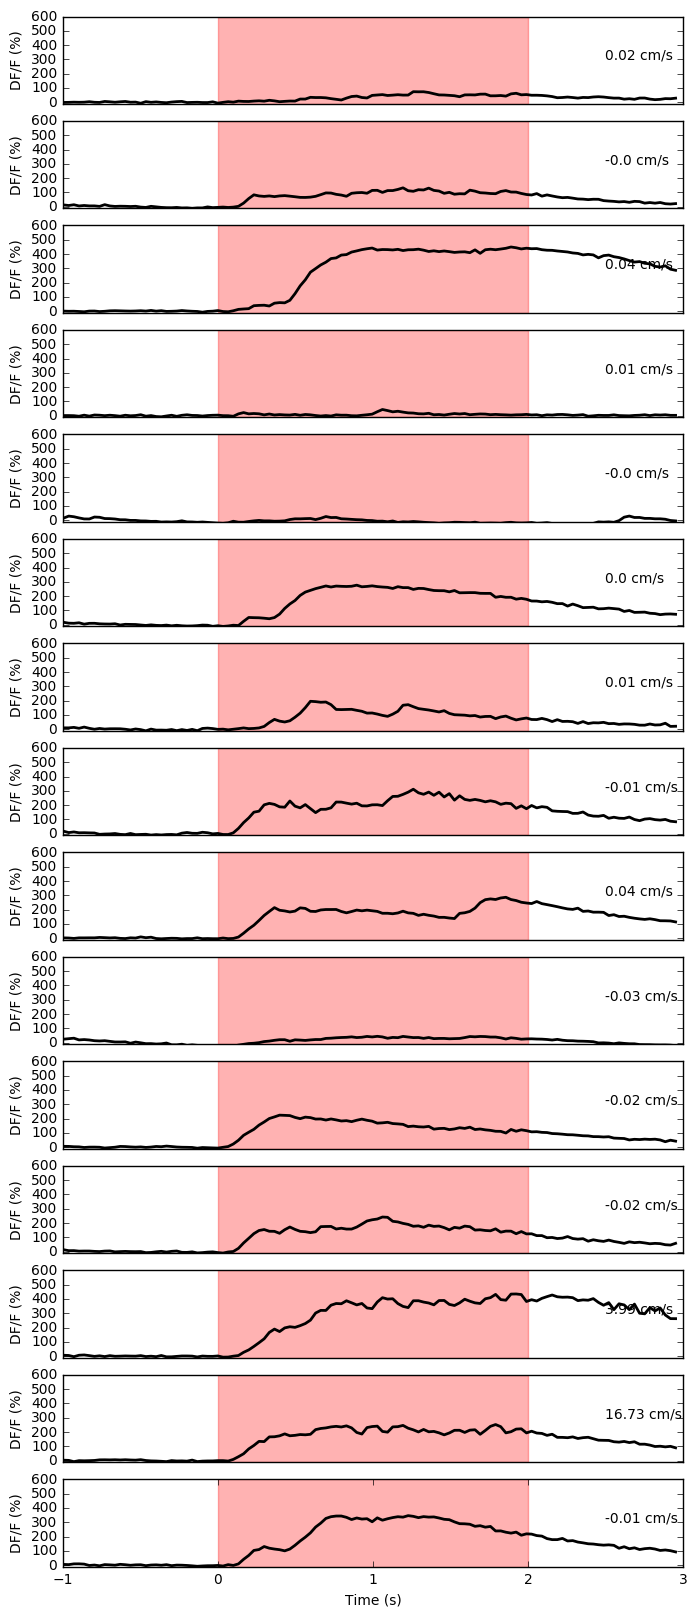

In [286]:
trial_timestamps = np.arange(-1*dg.interlength, dg.interlength+dg.sweeplength, 1.)/dg.acquisition_rate
plt.figure(figsize=(8,20))
for i in range(len(subset)):
    plt.subplot(len(pref_trials),1,i+1)
    plt.plot(trial_timestamps, subset[str(cell_loc)].iloc[i], color='k', lw=2)
    plt.axvspan(0,2,color='red', alpha=0.3)
    plt.ylabel("DF/F (%)")
    plt.ylim([-10,600])
    #plt.yticks(range(0,70,20))
    plt.text(2.5, 300, str(round(subset_mean['dx'].iloc[i],2))+" cm/s")
    if i<(len(subset)-1):
        plt.xticks([])
    else:
        plt.xticks([-1,0,1,2,3])
        plt.xlabel("Time (s)")

In [385]:
#we need to modify the tensor function to be able to give us what we want for static gratings. 
gratings_data = {}
x = 0;

for key in data_set.keys():
    dff, _, stim_table = get_data(data_set[key], stim_info.STATIC_GRATINGS)
    dxcm, dxtime = data_set[key].get_running_speed()
    
    stim_table_still = pd.DataFrame(columns = stim_table.columns)
    stim_table_run = pd.DataFrame(columns = stim_table.columns)


    for i, row in stim_table.iterrows():
        run_speed = np.average(dxcm[row['start']:row['end']])

        if run_speed > 1:
            stim_table_run = stim_table_run.append(row)
        else:
            stim_table_still =  stim_table_still.append(row)
            
    
    
    f_oneway()
    
    num_r = len(stim_table_still)
    num_s = len(stim_table_run)
    
    print "number of still trials: ", num_s, "len of running trials: ", num_r 
    
    prop = float(num_s) / (num_r + num_s)
    
    
    if  (prop > .7) or (prop < .3):
        x += 1
        print "skipping dataset not balanced enough between running and stationary...", x
    else:
        
        responses_run = arrange_data_tuning(dff, dxcm, stim_table_run, ratio = True)
        responses_still = arrange_data_tuning(dff, dxcm, stim_table_still, ratio = True)
        
        gratings_data[key] = (responses_run, responses_still, stim_table, stim_table_still, stim_table_run)
        

No stimulus template...
number of still trials:  1016 len of running trials:  4984
skipping dataset not balanced enough between running and stationary... 1
No stimulus template...
number of still trials:  495 len of running trials:  5505
skipping dataset not balanced enough between running and stationary... 2
No stimulus template...
number of still trials:  1898 len of running trials:  4102
No stimulus template...
number of still trials:  286 len of running trials:  5714
skipping dataset not balanced enough between running and stationary... 3
No stimulus template...
number of still trials:  537 len of running trials:  5463
skipping dataset not balanced enough between running and stationary... 4
No stimulus template...
number of still trials:  4506 len of running trials:  1494
skipping dataset not balanced enough between running and stationary... 5
No stimulus template...
number of still trials:  967 len of running trials:  5033
skipping dataset not balanced enough between running and s

In [ ]:
# get the preferred spatial frequency for each neuron (is there such a thing)
# then the look at the orientation tuning for 

In [386]:
all_resps = {}

for key in gratings_data.keys():
    responses_run, responses_still, stim_table, stim_table_still, stim_table_run = gratings_data[key]
    
    #for the sake of increasing our data, we're going to ignore phase for now
    orientations = stim_table['orientation'].unique()
    orientations = np.array(sorted(orientations[np.isfinite(orientations)]))

    sfreqs = stim_table['spatial_frequency'].unique()
    sfreqs = np.array(sorted(sfreqs[np.isfinite(sfreqs)]))

    num_os = len(orientations)
    num_ss = len(sfreqs)
    num_cells = responses_run.shape[1]

    resp_tensor_still = np.zeros([num_cells, num_os, num_ss])
    resp_tensor_run = np.zeros([num_cells, num_os, num_ss])
    
    for i, o in enumerate(orientations):

        for j, s in enumerate(sfreqs):

            ind_still = ((stim_table_still['orientation'] == o) & (stim_table_still['spatial_frequency'] == s)).values
            ind_run = ((stim_table_run['orientation'] == o) & (stim_table_run['spatial_frequency'] == s)).values
            
            resp_tensor_still[:, i, j] = np.average(responses_still[ind_still], axis = 0)
            resp_tensor_run[:, i, j] = np.average(responses_run[ind_run], axis = 0)
            
    all_resps[key] = (resp_tensor_still, resp_tensor_run)

In [ ]:
#now lets make some plots!

figure = plt.figure(figsize = [5, num_cells / 5])

gs, ax = gridplot(num_cells / 5, 5)

for i in range(len(ax)):
    ax[i].imshow(resp_tensor_still[i],interpolation='nearest', cmap = 'hot')
    ax[i].axis('Off')

plt.show()    

dataset:  507881529


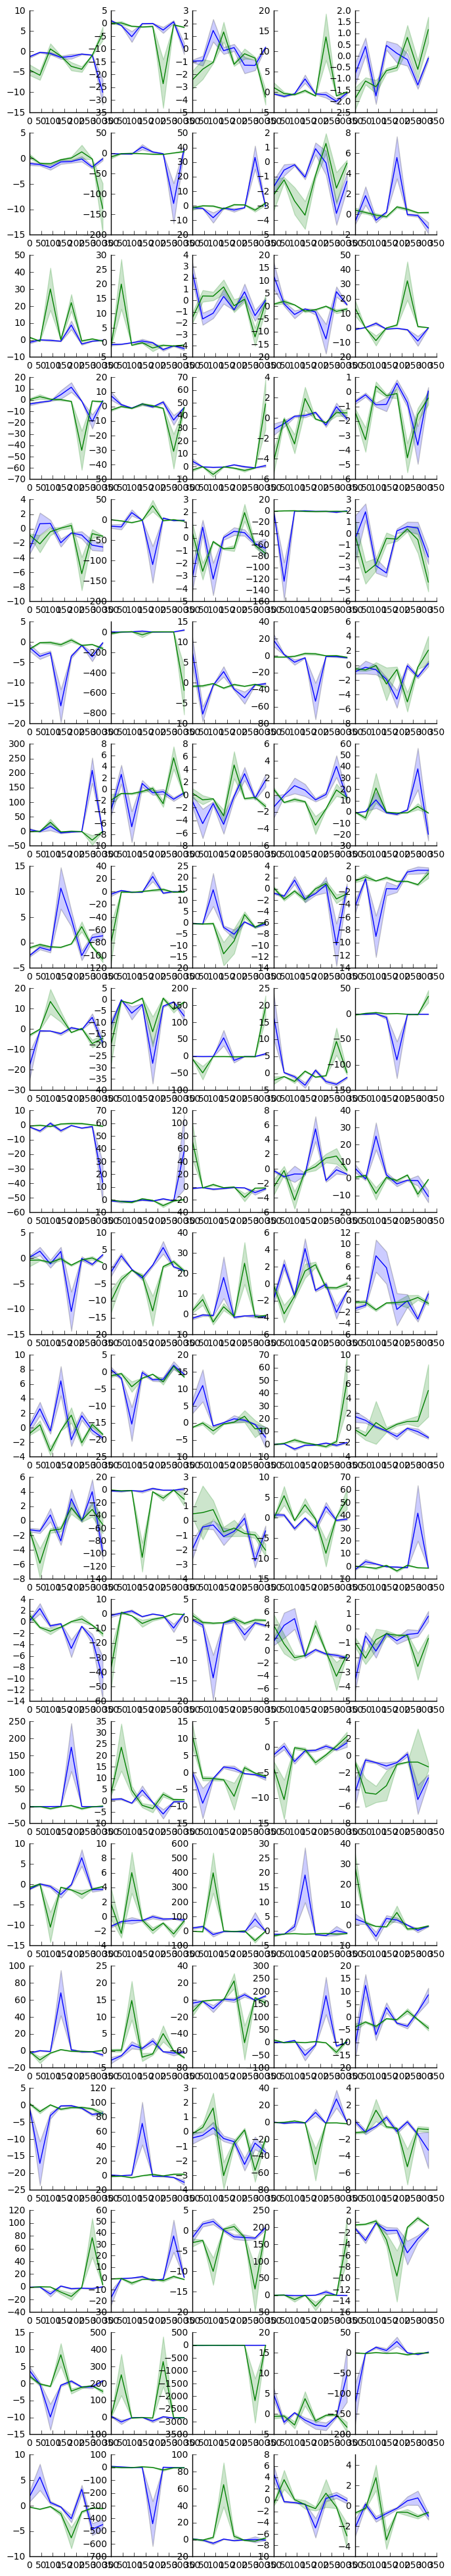

dataset:  505845219


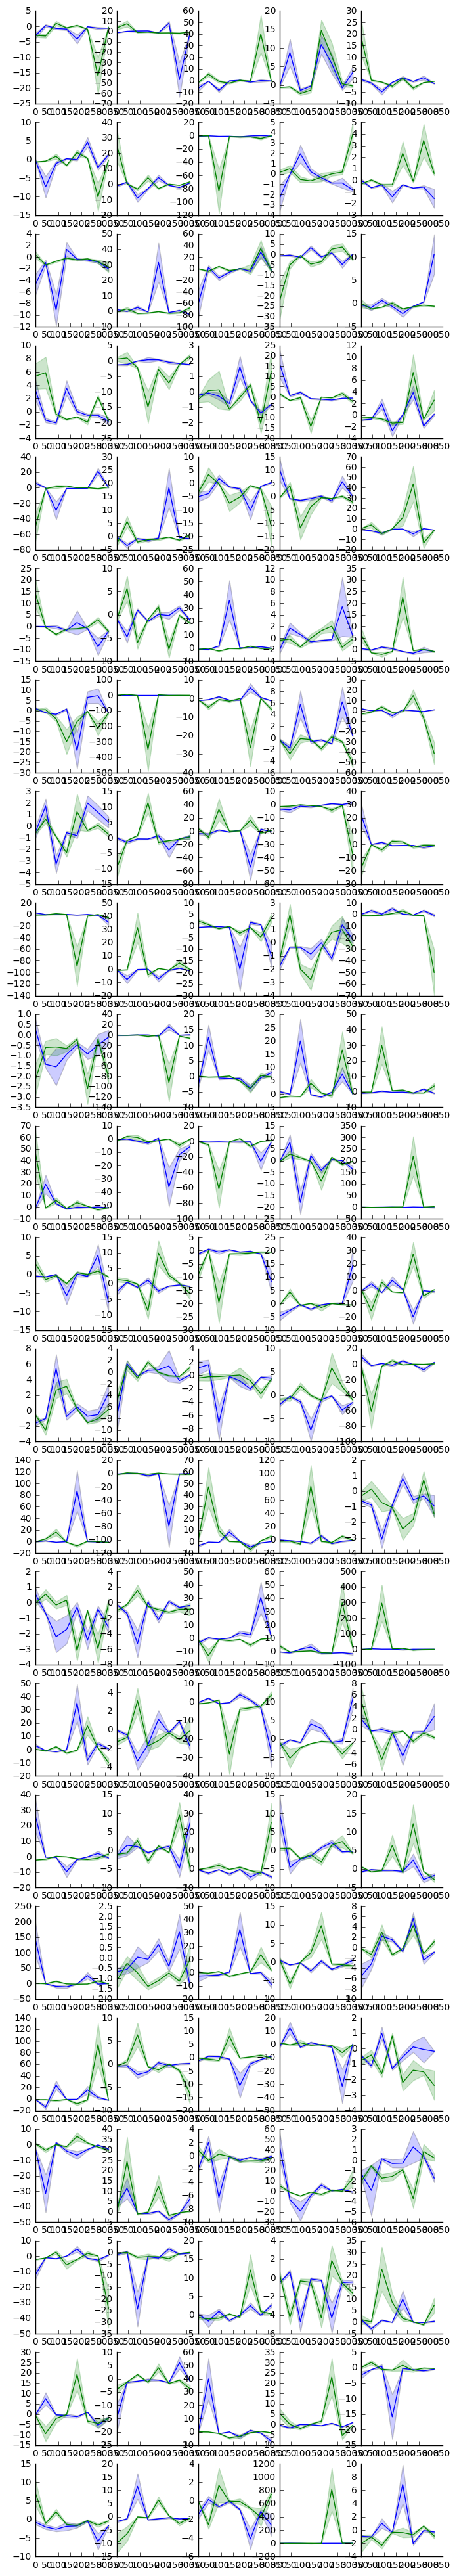

dataset:  502376461


IndexError: index 106 is out of bounds for axis 0 with size 106

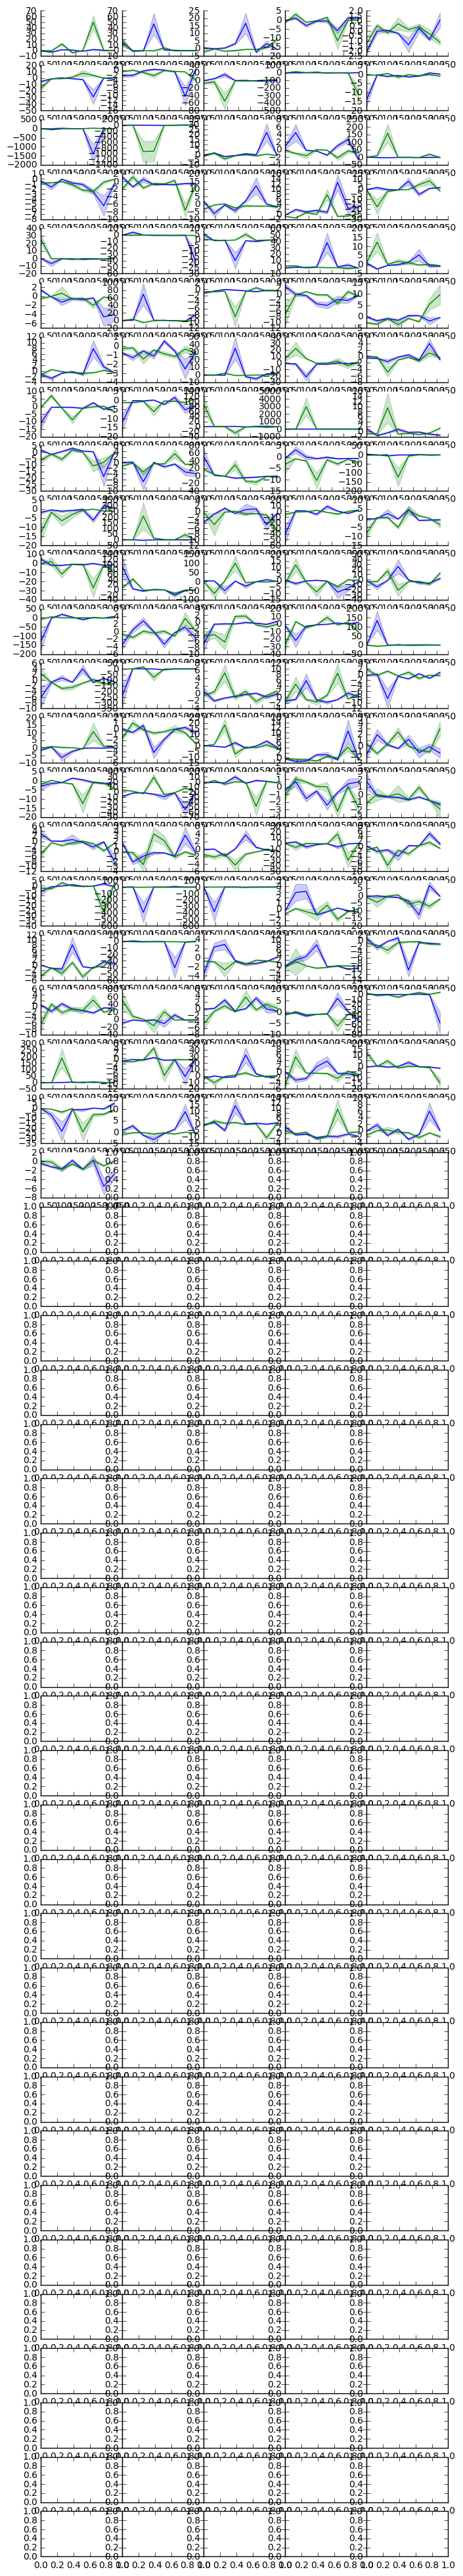

In [293]:
for key in all_resps.keys():
    print "dataset: ", key
    
    num_cells = resp_tensor_still.shape[0]
    
    resp_tensor_still, resp_tensor_run = all_resps[key]
    
    figure = plt.figure(figsize = [8, 50])

    gs, ax = gridplot(num_cells / 5, 5)

    for i in range(len(ax)):

        x = sorted(orientations)

        o_tun = np.average(resp_tensor_still[i], axis = 1)
        o_std = np.std(resp_tensor_still[i], axis = 1) / num_ss

        o_tun_r = np.average(resp_tensor_run[i], axis = 1)
        o_std_r = np.std(resp_tensor_run[i], axis = 1) / num_ss

        ax[i].plot(x, o_tun)
        ax[i].fill_between(x, o_tun - o_std, o_tun + o_std, alpha = .2)

        ax[i].plot(x, o_tun_r, color = 'g')
        ax[i].fill_between(x, o_tun_r - o_std_r, o_tun_r + o_std_r, color= 'g', alpha = .2)

        simpleaxis(ax[i])

    plt.show()  

In [387]:
orth = [3, 4, 5, 0, 1, 2]

orientation_run = []
osi_run = []
orientation_still = []
osi_still = []
temp_freq_run = []
temp_freq_still = []

for key in all_resps.keys():
    print "dataset: ", key
    
    resp_tensor_still, resp_tensor_run = all_resps[key]
    num_cells, num_os, num_ss = resp_tensor_still.shape
    
    for i in range(num_cells):
        idx = np.argmax(resp_tensor_run[i])
        o_in, s_in = np.unravel_index(idx, dims = [num_os, num_ss])
        
        pref_or = orientations[o_in]

        pref_dff = resp_tensor_run[i, o_in, s_in]
        orth_dff = resp_tensor_run[i, orth[o_in], s_in]
        
        
        orientation_run.append(pref_or)
        osi_run.append((pref_dff - orth_dff)/float(pref_dff + orth_dff))
        
        
        temp_freq_run.append(s_in)
        
        idx = np.argmax(resp_tensor_still[i])
        o_in, s_in = np.unravel_index(idx, dims = [num_os, num_ss])
                
        pref_dff = resp_tensor_still[i, o_in, s_in]
        orth_dff = resp_tensor_still[i, orth[o_in], s_in]        

    
        pref_or = orientations[o_in]
        
        orientation_still.append(pref_or)
        osi_still.append((pref_dff - orth_dff)/float(pref_dff + orth_dff))
    
        temp_freq_still.append(s_in)

dataset:  500964514
dataset:  501559087


In [388]:
plt.scatter(osi_run, osi_still)
plt.ylim([0, 10])
plt.xlim([0, 10])

(0, 10)

In [389]:
osi_run = np.array(osi_run)
osi_still = np.array(osi_still)

pruned_inds = (osi_run > 1) & (osi_still > 1)

In [390]:
figure = plt.figure(figsize = [12, 5])

orientation_run = np.array(orientation_run)
orientation_still = np.array(orientation_still)


ax = plt.subplot(221)
plt.scatter(orientation_run[pruned_inds], orientation_still[pruned_inds], alpha = .4)
plt.title('orientation tuning')
plt.ylabel('preferred orientation still')
plt.xlabel('preferred orientation running')
simpleaxis(ax)

ax = plt.subplot(222)
plt.scatter(sfreqs[temp_freq_run], sfreqs[temp_freq_still], alpha = .01)
plt.title('temporal frequency tuning')
plt.ylabel('preferred frequency still')
plt.xlabel('preferred frequency running')
simpleaxis(ax)